In [1]:
import random 
import pandas as pd
import numpy as np
import csv
from pandasql import sqldf
import statistics as stat
from statistics import mean
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import chi2

In [2]:
# Import Buxton_Challenge_Data.csv for a year's worth of 2016 predictive sales data 
file1 = 'Buxton_Challenge_Data.csv'
buxtonFile = pd.read_csv(file1, sep = ',')

# Create a DataFrame
dfBuxtonData = sqldf('''SELECT * FROM buxtonFile where SQFT >= 23000;''')
dfBuxtonData.head(70)

,SID,OPEN_YEAR,DENSITY_CLASS,REGION,STATE,SQFT,SALES_2016,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266491,NaN,2,SA,WV,44312.0,NaN,12577,42856,4562,...,95.04,94.38,91.29,93.65,93.28,89.92,3262854.94,723.47,2629199.03,510.38
1,21266492,NaN,2,SA,WV,47425.0,NaN,22113,42658,7638,...,88.49,81.97,87.78,86.80,79.71,85.79,3745254.61,704.30,4714278.64,501.17
2,21266494,NaN,2,MA,PA,59989.0,NaN,22118,51705,7953,...,92.95,89.92,93.15,89.33,87.28,91.56,4615043.23,728.06,4933560.86,552.78
3,21266495,NaN,3,SA,WV,60720.0,NaN,32392,60289,10830,...,93.99,95.66,96.62,91.94,94.36,95.57,5234084.09,643.69,5956571.33,460.80
4,21266496,1983.0,2,MA,PA,52861.0,6585542.0,22452,62057,7866,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
5,21266497,1984.0,2,SA,MD,50399.0,7580096.0,23272,51235,7276,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
6,21266498,1985.0,2,SA,WV,45520.0,7538990.0,16522,39299,5693,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
7,21266499,1986.0,2,ENC,OH,53872.0,6917103.0,8465,57556,3237,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
8,21266500,1987.0,3,MA,PA,62109.0,8395815.0,25324,139069,8964,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37
9,21266501,1988.0,2,ENC,OH,53838.0,7638873.0,39237,111330,8141,...,84.15,87.36,91.96,82.05,85.09,90.40,6169111.00,539.99,5241580.63,422.46


                 SALES_2016  AMENBOYS_0_5RO  AMENBOYS_1RO  AMENBOYS_8TO  \
SALES_2016         1.000000       -0.162827     -0.269079     -0.320294   
AMENBOYS_0_5RO    -0.162827        1.000000      0.935196      0.854139   
AMENBOYS_1RO      -0.269079        0.935196      1.000000      0.937531   
AMENBOYS_8TO      -0.320294        0.854139      0.937531      1.000000   
AMENBOYS_16TO     -0.361365        0.796257      0.896233      0.963501   
AWMNSGRLS_0_5RO    0.140361        0.403477      0.265356      0.143737   
AWMNSGRLS_1RO      0.007400        0.324596      0.325887      0.210726   
AWMNSGRLS_8TO     -0.083426        0.283561      0.299387      0.363714   
AWMNSGRLS_16TO    -0.142083        0.176256      0.208435      0.276269   

                 AMENBOYS_16TO  AWMNSGRLS_0_5RO  AWMNSGRLS_1RO  AWMNSGRLS_8TO  \
SALES_2016           -0.361365         0.140361       0.007400      -0.083426   
AMENBOYS_0_5RO        0.796257         0.403477       0.324596       0.283561   
AMENBO

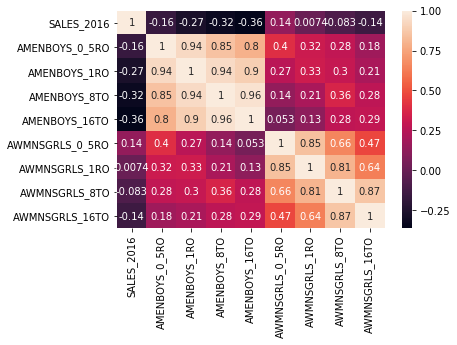

In [3]:
# Create a DataFrame for apparel expenditures for men and women
dfApparelExp = sqldf('''SELECT SALES_2016
,AMENBOYS_0_5RO
,AMENBOYS_1RO
,AMENBOYS_8TO
,AMENBOYS_16TO
,AWMNSGRLS_0_5RO
,AWMNSGRLS_1RO
,AWMNSGRLS_8TO
,AWMNSGRLS_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create correlation matrix for apparel expenditures for men and women
corrMatrix = dfApparelExp.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

              SALES_2016  AXFOOT_0_5RO  AXFOOT_1RO  AXFOOT_8TO  AXFOOT_16TO
SALES_2016      1.000000      0.223846    0.168748    0.146877     0.147791
AXFOOT_0_5RO    0.223846      1.000000    0.948314    0.826482     0.774152
AXFOOT_1RO      0.168748      0.948314    1.000000    0.900288     0.848580
AXFOOT_8TO      0.146877      0.826482    0.900288    1.000000     0.942234
AXFOOT_16TO     0.147791      0.774152    0.848580    0.942234     1.000000


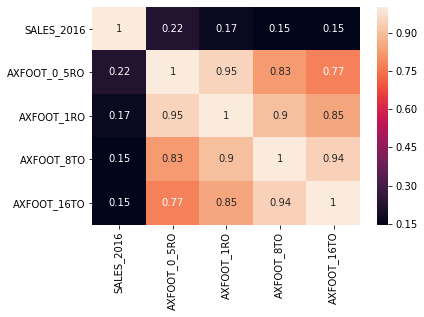

In [4]:
# Create a DataFrame for sql query below
dfAxFoot = sqldf('''SELECT SALES_2016
,AXFOOT_0_5RO
,AXFOOT_1RO
,AXFOOT_8TO
,AXFOOT_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfAxFoot.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                   SALES_2016  CMDSC_COMP_A_1RO  CMDSC_COMP_B_1RO  \
SALES_2016           1.000000          0.169245          0.075645   
CMDSC_COMP_A_1RO     0.169245          1.000000          0.236850   
CMDSC_COMP_B_1RO     0.075645          0.236850          1.000000   
CMDSC_COMP_C_1RO    -0.197898          0.038424         -0.017947   
CMDSC_COMP_D_1RO    -0.162888         -0.046243          0.086357   
CMDSC_COMP_E_1RO    -0.028957         -0.072974          0.334948   
CMDSC_GROCERY_1RO    0.046139         -0.035656         -0.073285   
CMDSC_PCBB_1RO      -0.035313          0.214112          0.326595   

                   CMDSC_COMP_C_1RO  CMDSC_COMP_D_1RO  CMDSC_COMP_E_1RO  \
SALES_2016                -0.197898         -0.162888         -0.028957   
CMDSC_COMP_A_1RO           0.038424         -0.046243         -0.072974   
CMDSC_COMP_B_1RO          -0.017947          0.086357          0.334948   
CMDSC_COMP_C_1RO           1.000000          0.000193         -0.016190   
CMD

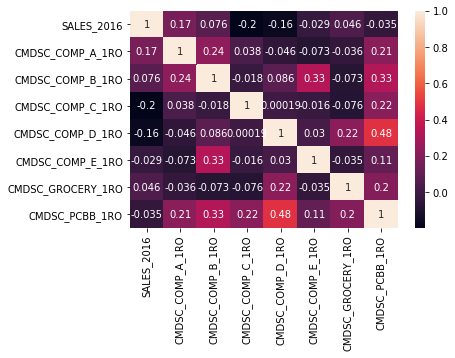

In [5]:
# Create a DataFrame for distance Score (Closer Proximity and Greater Count = Higher Value)
dfComp1RO = sqldf('''SELECT SALES_2016
,CMDSC_COMP_A_1RO
,CMDSC_COMP_B_1RO
,CMDSC_COMP_C_1RO
,CMDSC_COMP_D_1RO
,CMDSC_COMP_E_1RO
,CMDSC_GROCERY_1RO
,CMDSC_PCBB_1RO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create correlation matrix for distance Score (Closer Proximity and Greater Count = Higher Value)
corrMatrix = dfComp1RO.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CM_COMP_A_16TO  CM_COMP_B_16TO  CM_COMP_C_16TO  \
SALES_2016        1.000000       -0.054338       -0.226504       -0.382185   
CM_COMP_A_16TO   -0.054338        1.000000        0.539613        0.263388   
CM_COMP_B_16TO   -0.226504        0.539613        1.000000        0.564634   
CM_COMP_C_16TO   -0.382185        0.263388        0.564634        1.000000   
CM_COMP_D_16TO   -0.090293        0.430226        0.327712        0.293685   
CM_COMP_E_16TO   -0.294690        0.136819        0.222394        0.458343   

                CM_COMP_D_16TO  CM_COMP_E_16TO  
SALES_2016           -0.090293       -0.294690  
CM_COMP_A_16TO        0.430226        0.136819  
CM_COMP_B_16TO        0.327712        0.222394  
CM_COMP_C_16TO        0.293685        0.458343  
CM_COMP_D_16TO        1.000000        0.197765  
CM_COMP_E_16TO        0.197765        1.000000  


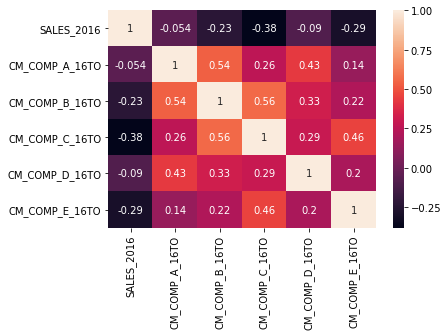

In [6]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CM_COMP_A_16TO
,CM_COMP_B_16TO
,CM_COMP_C_16TO
,CM_COMP_D_16TO
,CM_COMP_E_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                      SALES_2016  CM_GROCERY_0_5RO  CM_PCBB_0_5RO  \
SALES_2016              1.000000          0.036245      -0.032094   
CM_GROCERY_0_5RO        0.036245          1.000000       0.183793   
CM_PCBB_0_5RO          -0.032094          0.183793       1.000000   
CNT_MALLS_0_5RO        -0.253265          0.261907       0.527867   
CNT_MALLS_100K_0_5RO   -0.120255          0.312047       0.581204   
CNT_MALLS_300K_0_5RO    0.121318          0.194345       0.520782   
COMMUTE_AVG_16TO       -0.241401         -0.012425      -0.139493   

                      CNT_MALLS_0_5RO  CNT_MALLS_100K_0_5RO  \
SALES_2016                  -0.253265             -0.120255   
CM_GROCERY_0_5RO             0.261907              0.312047   
CM_PCBB_0_5RO                0.527867              0.581204   
CNT_MALLS_0_5RO              1.000000              0.877840   
CNT_MALLS_100K_0_5RO         0.877840              1.000000   
CNT_MALLS_300K_0_5RO         0.468447              0.591999   
COMMUT

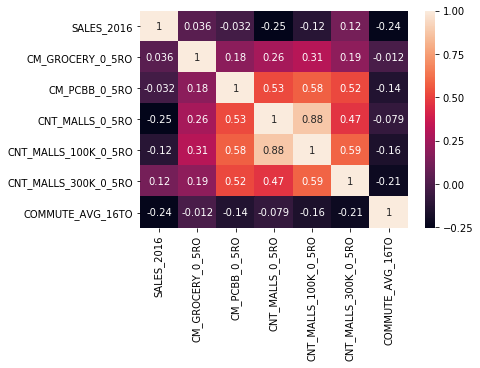

In [7]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CM_GROCERY_0_5RO
,CM_PCBB_0_5RO
,CNT_MALLS_0_5RO
,CNT_MALLS_100K_0_5RO
,CNT_MALLS_300K_0_5RO
,COMMUTE_AVG_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX01V142_0_5RO  CX01V142_1RO  CX01V142_8TO  \
SALES_2016        1.000000       -0.085285     -0.110862     -0.056268   
CX01V142_0_5RO   -0.085285        1.000000      0.883728      0.496789   
CX01V142_1RO     -0.110862        0.883728      1.000000      0.671019   
CX01V142_8TO     -0.056268        0.496789      0.671019      1.000000   
CX01V142_16TO    -0.074468        0.536327      0.622477      0.728228   

                CX01V142_16TO  
SALES_2016          -0.074468  
CX01V142_0_5RO       0.536327  
CX01V142_1RO         0.622477  
CX01V142_8TO         0.728228  
CX01V142_16TO        1.000000  


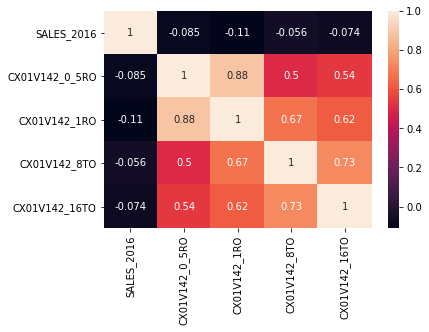

In [8]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX01V142_0_5RO
,CX01V142_1RO
,CX01V142_8TO
,CX01V142_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX01V143_0_5RO  CX01V143_1RO  CX01V143_8TO  \
SALES_2016        1.000000       -0.145063     -0.200345     -0.184762   
CX01V143_0_5RO   -0.145063        1.000000      0.865497      0.450074   
CX01V143_1RO     -0.200345        0.865497      1.000000      0.635965   
CX01V143_8TO     -0.184762        0.450074      0.635965      1.000000   
CX01V143_16TO    -0.179372        0.549605      0.647411      0.752379   

                CX01V143_16TO  
SALES_2016          -0.179372  
CX01V143_0_5RO       0.549605  
CX01V143_1RO         0.647411  
CX01V143_8TO         0.752379  
CX01V143_16TO        1.000000  


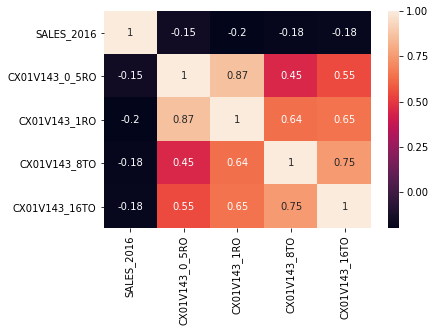

In [9]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX01V143_0_5RO
,CX01V143_1RO
,CX01V143_8TO
,CX01V143_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX02V051_0_5RO  CX02V051_1RO  CX02V051_8TO  \
SALES_2016        1.000000       -0.199635     -0.243249     -0.266931   
CX02V051_0_5RO   -0.199635        1.000000      0.835473      0.464969   
CX02V051_1RO     -0.243249        0.835473      1.000000      0.656915   
CX02V051_8TO     -0.266931        0.464969      0.656915      1.000000   
CX02V051_16TO    -0.201093        0.531009      0.587589      0.753952   

                CX02V051_16TO  
SALES_2016          -0.201093  
CX02V051_0_5RO       0.531009  
CX02V051_1RO         0.587589  
CX02V051_8TO         0.753952  
CX02V051_16TO        1.000000  


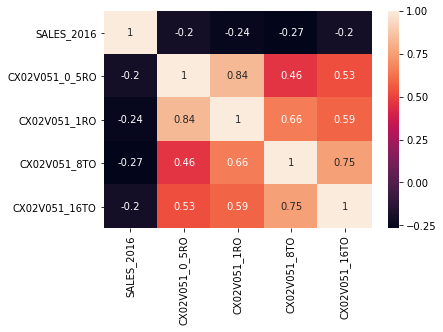

In [10]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX02V051_0_5RO
,CX02V051_1RO
,CX02V051_8TO
,CX02V051_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                 SALES_2016  DIST_HWY  DIST_INTERSTATE
SALES_2016         1.000000 -0.103055        -0.161311
DIST_HWY          -0.103055  1.000000        -0.147686
DIST_INTERSTATE   -0.161311 -0.147686         1.000000


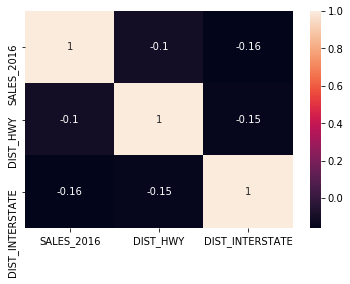

In [11]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016,DIST_HWY, DIST_INTERSTATE
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

              SALES_2016  EXP_AVG_1RO  EXP_AVG_8TO  EXP_AVG_16TO  EXP_TOT_1RO  \
SALES_2016      1.000000     0.107452    -0.008420     -0.084454    -0.187568   
EXP_AVG_1RO     0.107452     1.000000     0.842428      0.667371     0.244795   
EXP_AVG_8TO    -0.008420     0.842428     1.000000      0.861270     0.513844   
EXP_AVG_16TO   -0.084454     0.667371     0.861270      1.000000     0.595635   
EXP_TOT_1RO    -0.187568     0.244795     0.513844      0.595635     1.000000   
EXP_TOT_8TO    -0.216598     0.323013     0.489611      0.542696     0.683639   
EXP_TOT_16TO   -0.202975     0.280976     0.544049      0.532125     0.656926   
FPOP_1RO       -0.253746     0.028012     0.352795      0.501117     0.907465   
FPOP_8TO       -0.300047     0.076018     0.234443      0.348476     0.590784   
FPOP_16TO      -0.236302     0.132960     0.378181      0.349812     0.543944   

              EXP_TOT_8TO  EXP_TOT_16TO  FPOP_1RO  FPOP_8TO  FPOP_16TO  
SALES_2016      -0.216598     -0.20

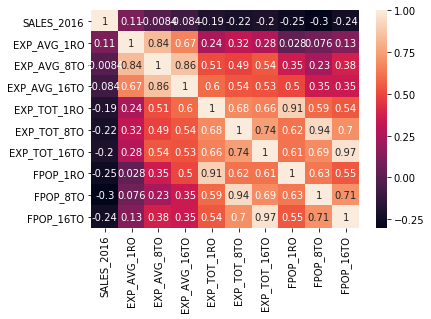

In [12]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,EXP_AVG_1RO
,EXP_AVG_8TO
,EXP_AVG_16TO
,EXP_TOT_1RO
,EXP_TOT_8TO
,EXP_TOT_16TO
,FPOP_1RO
,FPOP_8TO
,FPOP_16TO
FROM buxtonFile;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

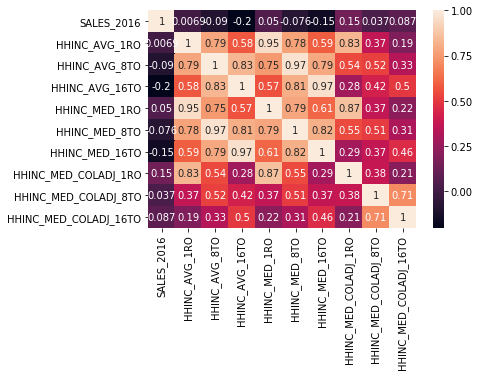

In [13]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHINC_AVG_1RO
,HHINC_AVG_8TO
,HHINC_AVG_16TO
,HHINC_MED_1RO
,HHINC_MED_8TO
,HHINC_MED_16TO
,HHINC_MED_COLADJ_1RO
,HHINC_MED_COLADJ_8TO
,HHINC_MED_COLADJ_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

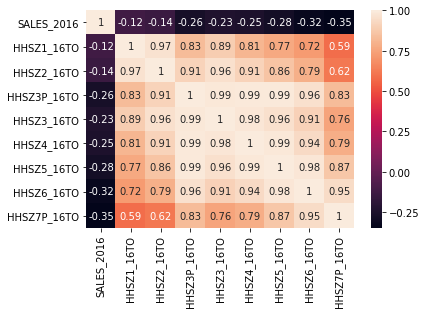

In [14]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ1_16TO
,HHSZ2_16TO
,HHSZ3P_16TO
,HHSZ3_16TO
,HHSZ4_16TO
,HHSZ5_16TO
,HHSZ6_16TO
,HHSZ7P_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

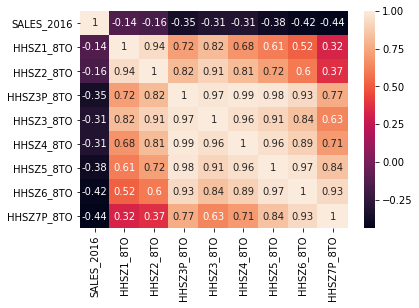

In [15]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ1_8TO
,HHSZ2_8TO
,HHSZ3P_8TO
,HHSZ3_8TO
,HHSZ4_8TO
,HHSZ5_8TO
,HHSZ6_8TO
,HHSZ7P_8TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

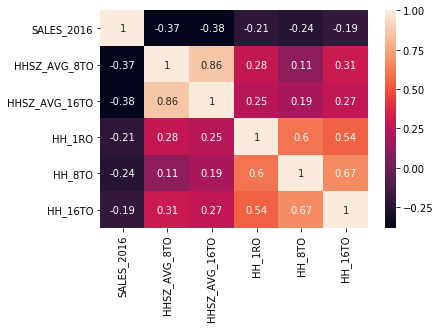

In [16]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ_AVG_8TO
,HHSZ_AVG_16TO
,HH_1RO
,HH_8TO
,HH_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

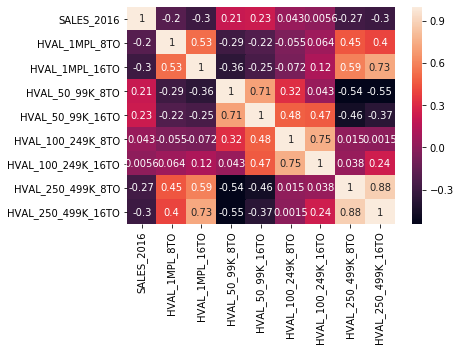

In [17]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HVAL_1MPL_8TO
,HVAL_1MPL_16TO
,HVAL_50_99K_8TO
,HVAL_50_99K_16TO
,HVAL_100_249K_8TO
,HVAL_100_249K_16TO
,HVAL_250_499K_8TO
,HVAL_250_499K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

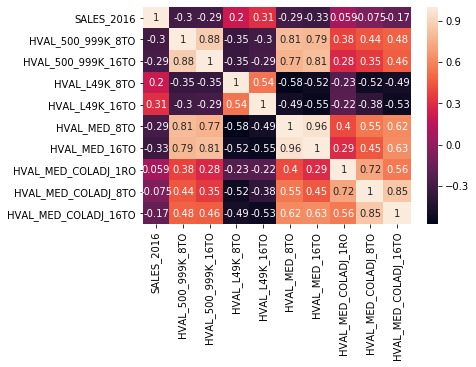

In [18]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HVAL_500_999K_8TO
,HVAL_500_999K_16TO
,HVAL_L49K_8TO
,HVAL_L49K_16TO
,HVAL_MED_8TO
,HVAL_MED_16TO
,HVAL_MED_COLADJ_1RO
,HVAL_MED_COLADJ_8TO
,HVAL_MED_COLADJ_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

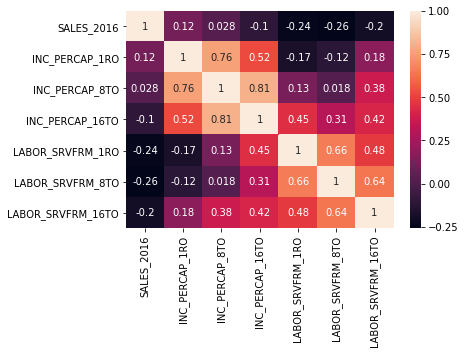

In [19]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,INC_PERCAP_1RO
,INC_PERCAP_8TO
,INC_PERCAP_16TO
,LABOR_SRVFRM_1RO
,LABOR_SRVFRM_8TO
,LABOR_SRVFRM_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

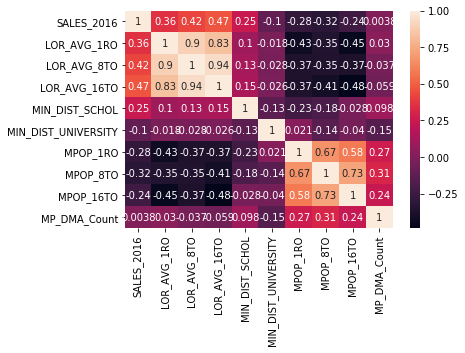

In [20]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,LOR_AVG_1RO
,LOR_AVG_8TO
,LOR_AVG_16TO
,MIN_DIST_SCHOL
,MIN_DIST_UNIVERSITY
,MPOP_1RO
,MPOP_8TO
,MPOP_16TO
,MP_DMA_Count
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

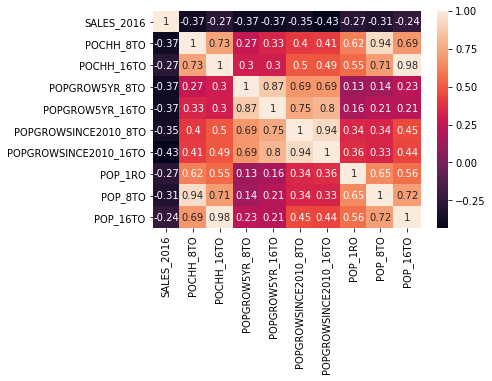

In [21]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,POCHH_8TO
,POCHH_16TO
,POPGROW5YR_8TO
,POPGROW5YR_16TO
,POPGROWSINCE2010_8TO
,POPGROWSINCE2010_16TO
,POP_1RO
,POP_8TO
,POP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

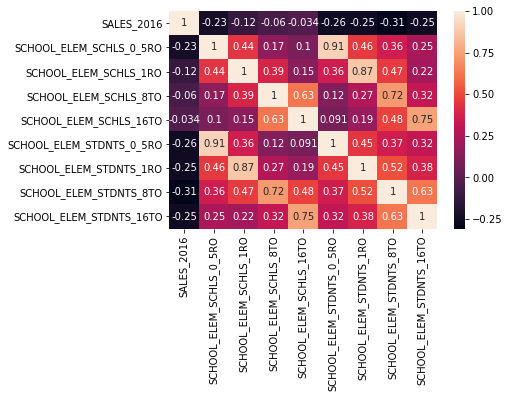

In [22]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_ELEM_SCHLS_0_5RO
,SCHOOL_ELEM_SCHLS_1RO
,SCHOOL_ELEM_SCHLS_8TO
,SCHOOL_ELEM_SCHLS_16TO
,SCHOOL_ELEM_STDNTS_0_5RO
,SCHOOL_ELEM_STDNTS_1RO
,SCHOOL_ELEM_STDNTS_8TO
,SCHOOL_ELEM_STDNTS_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

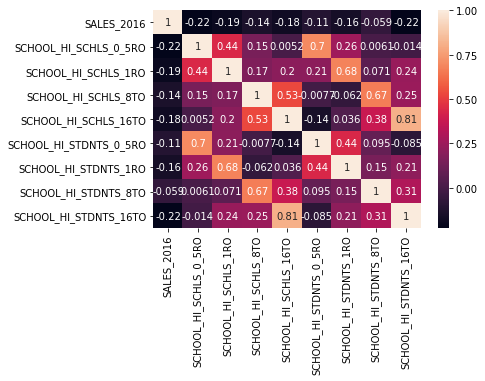

In [23]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_HI_SCHLS_0_5RO
,SCHOOL_HI_SCHLS_1RO
,SCHOOL_HI_SCHLS_8TO
,SCHOOL_HI_SCHLS_16TO
,SCHOOL_HI_STDNTS_0_5RO
,SCHOOL_HI_STDNTS_1RO
,SCHOOL_HI_STDNTS_8TO
,SCHOOL_HI_STDNTS_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

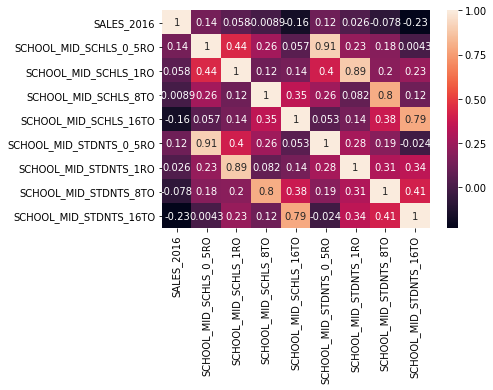

In [24]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_MID_SCHLS_0_5RO
,SCHOOL_MID_SCHLS_1RO
,SCHOOL_MID_SCHLS_8TO
,SCHOOL_MID_SCHLS_16TO
,SCHOOL_MID_STDNTS_0_5RO
,SCHOOL_MID_STDNTS_1RO
,SCHOOL_MID_STDNTS_8TO
,SCHOOL_MID_STDNTS_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

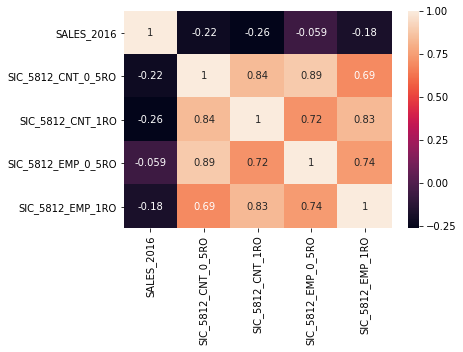

In [25]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SIC_5812_CNT_0_5RO
,SIC_5812_CNT_1RO
,SIC_5812_EMP_0_5RO
,SIC_5812_EMP_1RO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

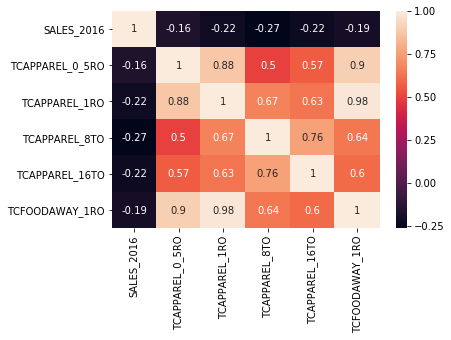

In [26]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,TCAPPAREL_0_5RO
,TCAPPAREL_1RO
,TCAPPAREL_8TO
,TCAPPAREL_16TO
,TCFOODAWAY_1RO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

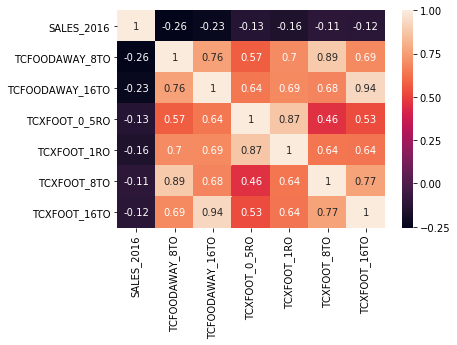

In [27]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,TCFOODAWAY_8TO
,TCFOODAWAY_16TO
,TCXFOOT_0_5RO
,TCXFOOT_1RO
,TCXFOOT_8TO
,TCXFOOT_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

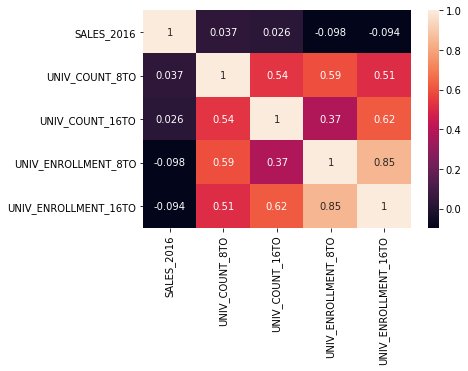

In [28]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,UNIV_COUNT_8TO
,UNIV_COUNT_16TO
,UNIV_ENROLLMENT_8TO
,UNIV_ENROLLMENT_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

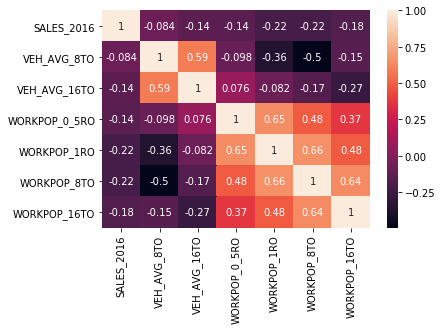

In [29]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,VEH_AVG_8TO
,VEH_AVG_16TO
,WORKPOP_0_5RO
,WORKPOP_1RO
,WORKPOP_8TO
,WORKPOP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

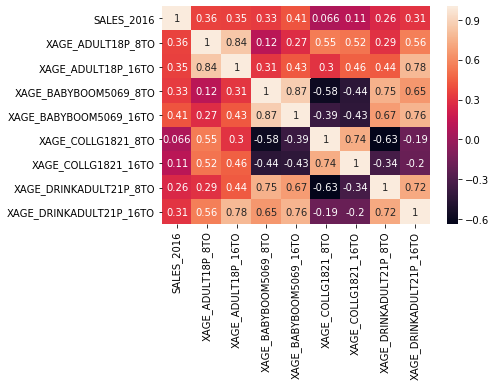

In [30]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_ADULT18P_8TO
,XAGE_ADULT18P_16TO
,XAGE_BABYBOOM5069_8TO
,XAGE_BABYBOOM5069_16TO
,XAGE_COLLG1821_8TO
,XAGE_COLLG1821_16TO
,XAGE_DRINKADULT21P_8TO
,XAGE_DRINKADULT21P_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

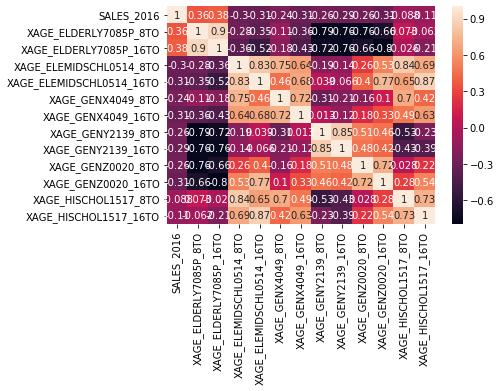

In [31]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_ELDERLY7085P_8TO
,XAGE_ELDERLY7085P_16TO
,XAGE_ELEMIDSCHL0514_8TO
,XAGE_ELEMIDSCHL0514_16TO
,XAGE_GENX4049_8TO
,XAGE_GENX4049_16TO
,XAGE_GENY2139_8TO
,XAGE_GENY2139_16TO
,XAGE_GENZ0020_8TO
,XAGE_GENZ0020_16TO
,XAGE_HISCHOL1517_8TO
,XAGE_HISCHOL1517_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

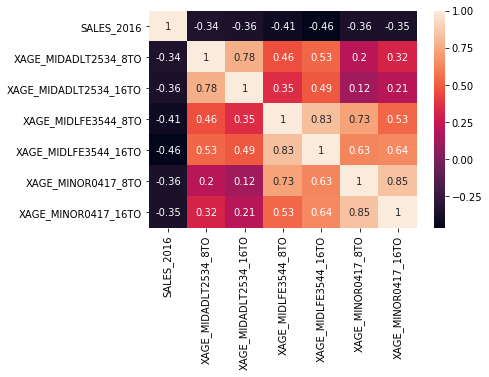

In [32]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_MIDADLT2534_8TO
,XAGE_MIDADLT2534_16TO
,XAGE_MIDLFE3544_8TO
,XAGE_MIDLFE3544_16TO
,XAGE_MINOR0417_8TO
,XAGE_MINOR0417_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

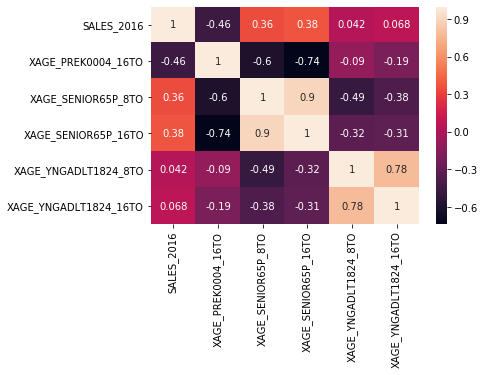

In [33]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_PREK0004_16TO
,XAGE_SENIOR65P_8TO
,XAGE_SENIOR65P_16TO
,XAGE_YNGADLT1824_8TO
,XAGE_YNGADLT1824_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

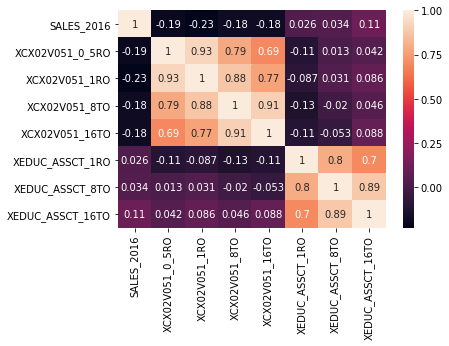

In [34]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XCX02V051_0_5RO
,XCX02V051_1RO
,XCX02V051_8TO
,XCX02V051_16TO
,XEDUC_ASSCT_1RO
,XEDUC_ASSCT_8TO
,XEDUC_ASSCT_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

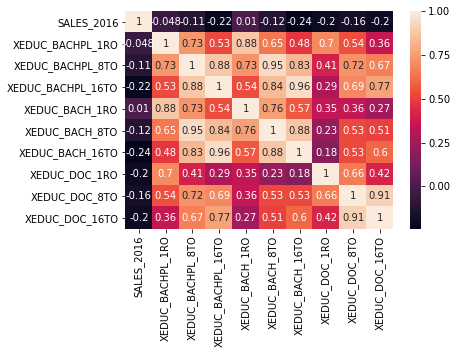

In [35]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XEDUC_BACHPL_1RO
,XEDUC_BACHPL_8TO
,XEDUC_BACHPL_16TO
,XEDUC_BACH_1RO
,XEDUC_BACH_8TO
,XEDUC_BACH_16TO
,XEDUC_DOC_1RO
,XEDUC_DOC_8TO
,XEDUC_DOC_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

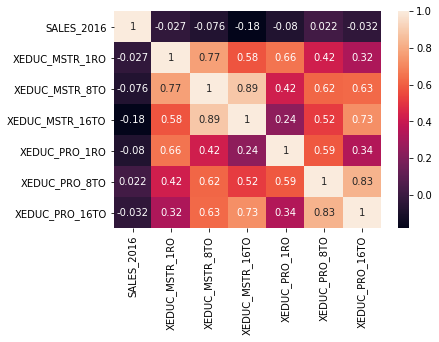

In [36]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XEDUC_MSTR_1RO
,XEDUC_MSTR_8TO
,XEDUC_MSTR_16TO
,XEDUC_PRO_1RO
,XEDUC_PRO_8TO
,XEDUC_PRO_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

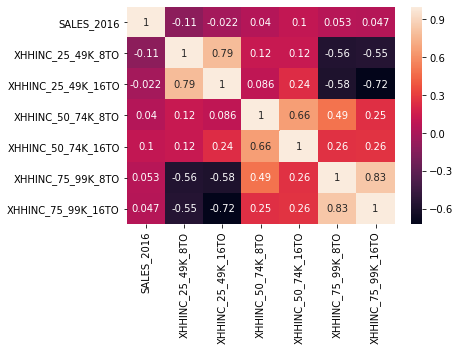

In [37]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_25_49K_8TO
,XHHINC_25_49K_16TO
,XHHINC_50_74K_8TO
,XHHINC_50_74K_16TO
,XHHINC_75_99K_8TO
,XHHINC_75_99K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

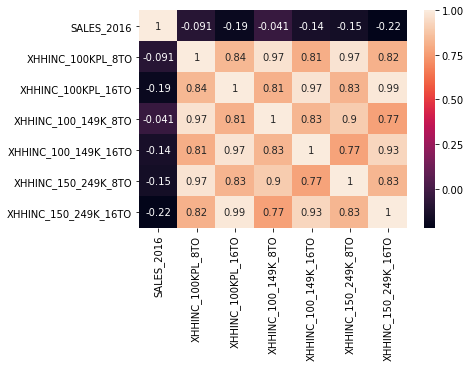

In [38]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_100KPL_8TO
,XHHINC_100KPL_16TO
,XHHINC_100_149K_8TO
,XHHINC_100_149K_16TO
,XHHINC_150_249K_8TO
,XHHINC_150_249K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

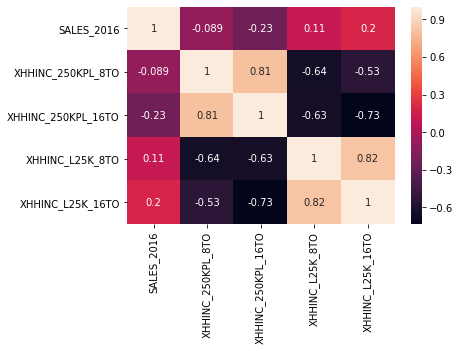

In [39]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_250KPL_8TO
,XHHINC_250KPL_16TO
,XHHINC_L25K_8TO
,XHHINC_L25K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

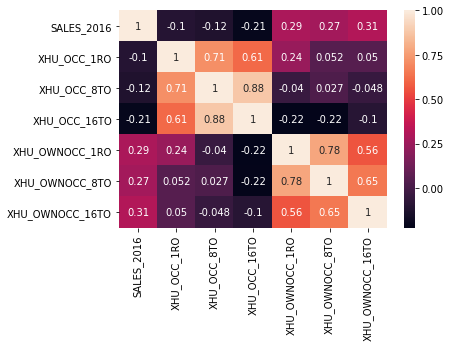

In [40]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_OCC_1RO
,XHU_OCC_8TO
,XHU_OCC_16TO
,XHU_OWNOCC_1RO
,XHU_OWNOCC_8TO
,XHU_OWNOCC_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

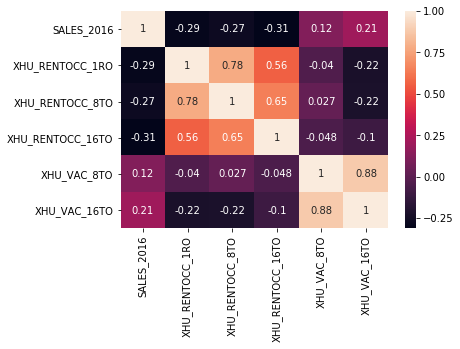

In [41]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_RENTOCC_1RO
,XHU_RENTOCC_8TO
,XHU_RENTOCC_16TO
,XHU_VAC_8TO
,XHU_VAC_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

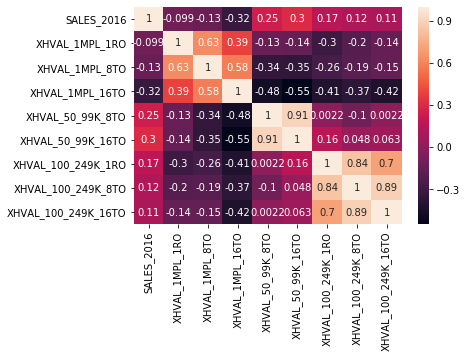

In [42]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHVAL_1MPL_1RO
,XHVAL_1MPL_8TO
,XHVAL_1MPL_16TO
,XHVAL_50_99K_8TO
,XHVAL_50_99K_16TO
,XHVAL_100_249K_1RO
,XHVAL_100_249K_8TO
,XHVAL_100_249K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

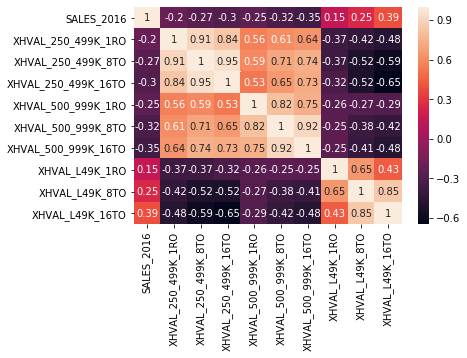

In [43]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHVAL_250_499K_1RO
,XHVAL_250_499K_8TO
,XHVAL_250_499K_16TO
,XHVAL_500_999K_1RO
,XHVAL_500_999K_8TO
,XHVAL_500_999K_16TO
,XHVAL_L49K_1RO
,XHVAL_L49K_8TO
,XHVAL_L49K_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

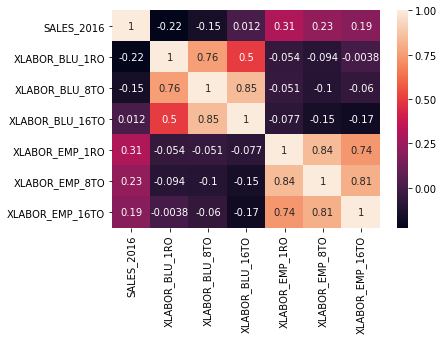

In [44]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_BLU_1RO
,XLABOR_BLU_8TO
,XLABOR_BLU_16TO
,XLABOR_EMP_1RO
,XLABOR_EMP_8TO
,XLABOR_EMP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

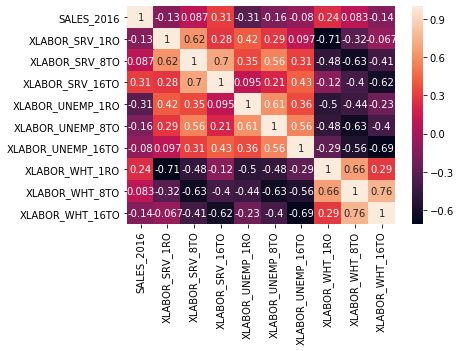

In [45]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_SRV_1RO
,XLABOR_SRV_8TO
,XLABOR_SRV_16TO
,XLABOR_UNEMP_1RO
,XLABOR_UNEMP_8TO
,XLABOR_UNEMP_16TO
,XLABOR_WHT_1RO
,XLABOR_WHT_8TO
,XLABOR_WHT_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

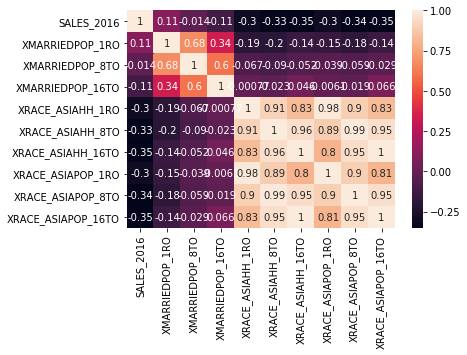

In [46]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XMARRIEDPOP_1RO
,XMARRIEDPOP_8TO
,XMARRIEDPOP_16TO
,XRACE_ASIAHH_1RO
,XRACE_ASIAHH_8TO
,XRACE_ASIAHH_16TO
,XRACE_ASIAPOP_1RO
,XRACE_ASIAPOP_8TO
,XRACE_ASIAPOP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

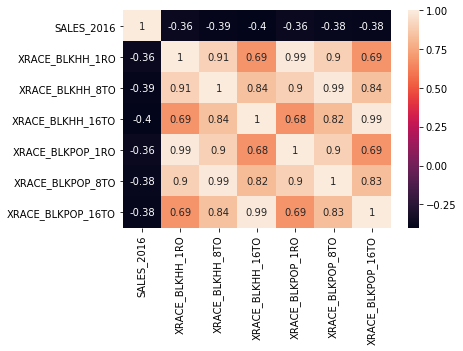

In [47]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_BLKHH_1RO
,XRACE_BLKHH_8TO
,XRACE_BLKHH_16TO
,XRACE_BLKPOP_1RO
,XRACE_BLKPOP_8TO
,XRACE_BLKPOP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

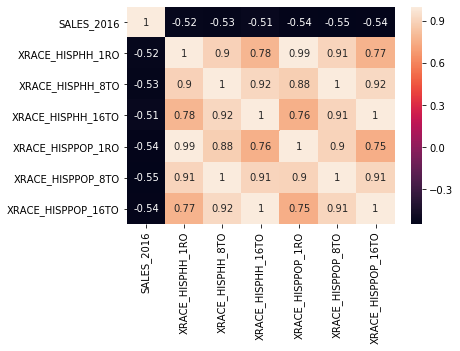

In [48]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_HISPHH_1RO
,XRACE_HISPHH_8TO
,XRACE_HISPHH_16TO
,XRACE_HISPPOP_1RO
,XRACE_HISPPOP_8TO
,XRACE_HISPPOP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

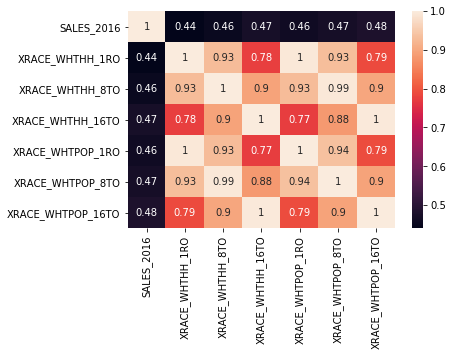

In [49]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_WHTHH_1RO
,XRACE_WHTHH_8TO
,XRACE_WHTHH_16TO
,XRACE_WHTPOP_1RO
,XRACE_WHTPOP_8TO
,XRACE_WHTPOP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

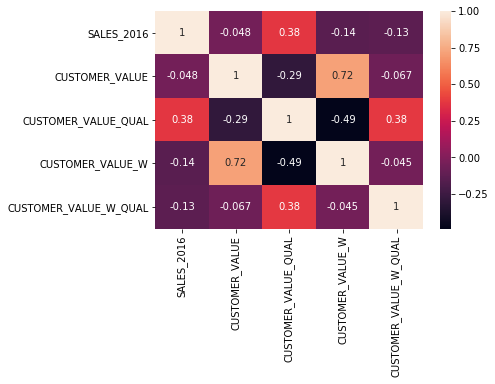

In [50]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CUSTOMER_VALUE
,CUSTOMER_VALUE_QUAL
,CUSTOMER_VALUE_W
,CUSTOMER_VALUE_W_QUAL
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

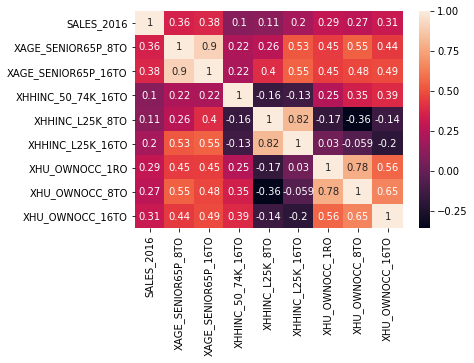

In [51]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_SENIOR65P_8TO 
,XAGE_SENIOR65P_16TO 
,XHHINC_50_74K_16TO 
,XHHINC_L25K_8TO 
,XHHINC_L25K_16TO 
,XHU_OWNOCC_1RO 
,XHU_OWNOCC_8TO 
,XHU_OWNOCC_16TO 
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

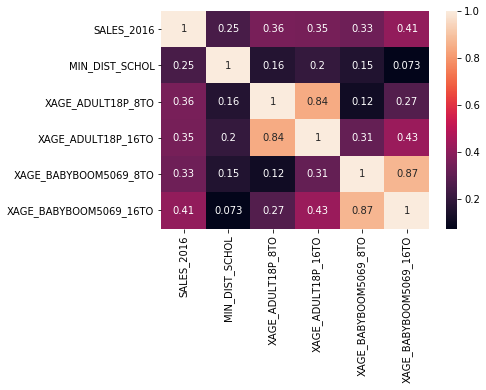

In [52]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,MIN_DIST_SCHOL 
,XAGE_ADULT18P_8TO 
,XAGE_ADULT18P_16TO 
,XAGE_BABYBOOM5069_8TO 
,XAGE_BABYBOOM5069_16TO 
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

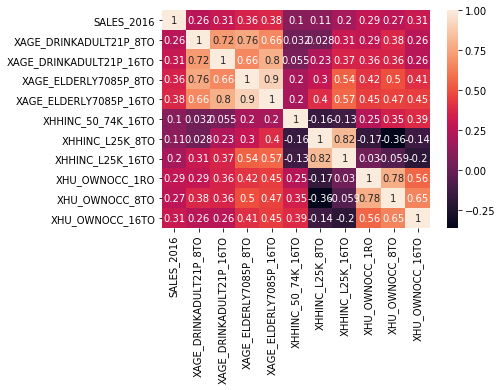

In [53]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_DRINKADULT21P_8TO 
,XAGE_DRINKADULT21P_16TO 
,XAGE_ELDERLY7085P_8TO 
,XAGE_ELDERLY7085P_16TO 
,XHHINC_50_74K_16TO 
,XHHINC_L25K_8TO 
,XHHINC_L25K_16TO 
,XHU_OWNOCC_1RO 
,XHU_OWNOCC_8TO 
,XHU_OWNOCC_16TO  
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

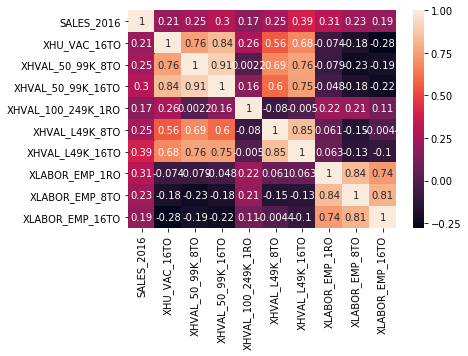

In [54]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_VAC_16TO 
,XHVAL_50_99K_8TO 
,XHVAL_50_99K_16TO
,XHVAL_100_249K_1RO 
,XHVAL_L49K_8TO 
,XHVAL_L49K_16TO 
,XLABOR_EMP_1RO 
,XLABOR_EMP_8TO
,XLABOR_EMP_16TO
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

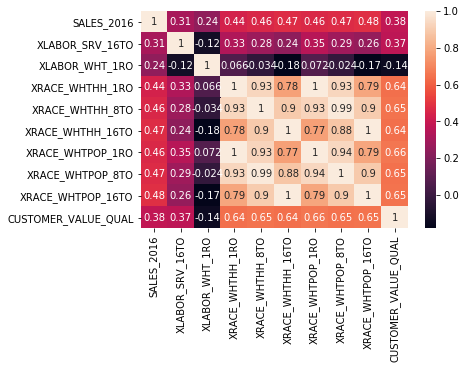

In [55]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_SRV_16TO 
,XLABOR_WHT_1RO 
,XRACE_WHTHH_1RO 
,XRACE_WHTHH_8TO 
,XRACE_WHTHH_16TO 
,XRACE_WHTPOP_1RO 
,XRACE_WHTPOP_8TO 
,XRACE_WHTPOP_16TO
,CUSTOMER_VALUE_QUAL 
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

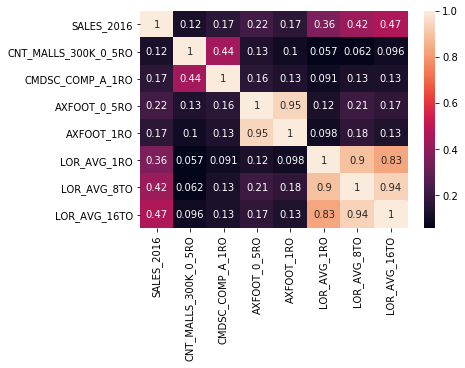

In [56]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CNT_MALLS_300K_0_5RO 
,CMDSC_COMP_A_1RO 
,AXFOOT_0_5RO 
,AXFOOT_1RO
,LOR_AVG_1RO
,LOR_AVG_8TO 
,LOR_AVG_16TO 
FROM buxtonFile;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)